## Import libraries

In [123]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Data

In [124]:
tmdb_box = pd.read_csv('tmdb_box_merge_new.csv')

## Data Processing

In [125]:
tmdb_box.head(2)

,title,production_budget,domestic_gross_x,worldwide_gross,studio,genre_ids,original_language,popularity,vote_average,vote_count,date,Year,Month
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,"[12, 28, 14]",en,30.579,6.4,8571.0,2011-05-20,2011.0,5.0
1,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,6.0


In [126]:
# drop 'Unnamed: 0' col
#tmdb_box.drop(columns=['Unnamed: 0'], inplace=True)

### Parsing Genre

- parse genre_ids 

```
    orginal form:  
        movie 1, genre_ids '[12, 14, 10751]'
    target form: 
        movie 1, genre_id 12
        movie 1, genre_id 14
        movie 1, genre_id 10751
```  

In [127]:
import string
def parse_str(s):
    ''' convert s to a list of numbers
        example: 
        input: s = '[12, 14, 10751]'
        output: ['12', '14', '10751']   
    '''
    # strip all punctuation from a string 
    s = s.translate(str.maketrans('', '', string.punctuation))
    # string to list 
        # alternative: s_list = [int(n) for n in s.split()]
    return s.split()

In [128]:
# covert genre_ids '[12, 14, 10751]' to  list of int ['12', '14', '10751']
mask = ~tmdb_box['genre_ids'].isnull()
tmdb_box.loc[mask, 'genre_ids'] = tmdb_box.loc[mask,'genre_ids'].apply(parse_str)

In [129]:
# df_genre"  =  a copy of original df 
tmdb_box_genre = tmdb_box.copy() # a slice copy of tmdb_movies

In [130]:
tmdb_box_genre.columns

Index(['title', 'production_budget', 'domestic_gross_x', 'worldwide_gross',
       'studio', 'genre_ids', 'original_language', 'popularity',
       'vote_average', 'vote_count', 'date', 'Year', 'Month'],
      dtype='object')

In [131]:
# melt tmdb_movies_genre based on ['genre_ids']
id_vars = [col for col in tmdb_box_genre.columns if col !='genre_ids']
tmdb_box_genre = tmdb_box_genre['genre_ids'].apply(pd.Series)\
                    .merge(tmdb_box_genre, left_index = True, right_index = True)\
                    .drop(["genre_ids"], axis = 1)\
                    .melt(id_vars = id_vars, value_name = "genre")

In [132]:
# drop col 'variable'
tmdb_box_genre.drop(columns=['variable'], inplace = True)  
# drop rows with genre NaN 
tmdb_box_genre.dropna(subset = ['genre'], inplace = True)

In [133]:
# mapping genres_id to genre
tmdb_genres=[{'id': 28, 'name': 'Action'},
            {'id': 12, 'name': 'Adventure'},
            {'id': 16, 'name': 'Animation'},
            {'id': 35, 'name': 'Comedy'},
            {'id': 80, 'name': 'Crime'},
            {'id': 99, 'name': 'Documentary'},
            {'id': 18, 'name': 'Drama'},
            {'id': 10751, 'name': 'Family'},
            {'id': 14, 'name': 'Fantasy'},
            {'id': 36, 'name': 'History'},
            {'id': 27, 'name': 'Horror'},
            {'id': 10402, 'name': 'Music'},
            {'id': 9648, 'name': 'Mystery'},
            {'id': 10749, 'name': 'Romance'},
            {'id': 878, 'name': 'Science Fiction'},
            {'id': 10770, 'name': 'TV Movie'},
            {'id': 53, 'name': 'Thriller'},
            {'id': 10752, 'name': 'War'},
            {'id': 37, 'name': 'Western'}]

In [134]:
# create a dict with {id_value1:genre1, id_value2:genre2} from tmdb_genres
genre_dict = {}
for pair in tmdb_genres:
    genre_dict[pair['id']] = pair['name']

# 'genre' col has dtype (O), convert to int 
tmdb_box_genre['genre'] = tmdb_box_genre['genre'].astype(int) 

# map genre_id to genre 
tmdb_box_genre['genre'] = tmdb_box_genre['genre'].map(genre_dict)  

## Data Analysis & Visualization

In [135]:
cols = ['production_budget', 'domestic_gross_x', 'vote_count', 'vote_average']

In [136]:
tmdb_box_genre.groupby('genre').describe()[cols].T

genre                          Action     Adventure     Animation  \
production_budget count  4.290000e+02  2.710000e+02  1.010000e+02   
                  mean   7.694244e+07  1.084517e+08  9.195545e+07   
                  std    7.215551e+07  7.470234e+07  5.716258e+07   
                  min    1.000000e+05  2.500000e+04  1.500000e+06   
                  25%    2.200000e+07  4.200000e+07  5.000000e+07   
                  50%    5.000000e+07  1.000000e+08  8.000000e+07   
                  75%    1.200000e+08  1.650000e+08  1.350000e+08   
                  max    4.106000e+08  4.106000e+08  2.600000e+08   
domestic_gross_x  count  4.290000e+02  2.710000e+02  1.010000e+02   
                  mean   8.433737e+07  1.240345e+08  1.329487e+08   
                  std    1.148814e+08  1.298617e+08  1.307744e+08   
                  min    0.000000e+00  0.000000e+00  0.000000e+00   
                  25%    1.050194e+07  2.858325e+07  4.502028e+07   
                  50%    4.356851e+07  8.010112e+07  1.075094e+08   
                  75%    1.038603e+08  1.806164e+08  1.757504e+08   
                  max    7.000596e+08  6.788155e+08  7.000596e+08   
vote_count        count  2.412000e+03  1.264000e+03  1.383000e+03   
                  mean   6.660182e+02  1.060273e+03  2.547527e+02   
                  std    2.017991e+03  2.720328e+03  9.867997e+02   
                  min    1.000000e+00  1.000000e+00  1.000000e+00   
                  25%    4.000000e+00  4.000000e+00  2.000000e+00   
                  50%    2.300000e+01  2.600000e+01  8.000000e+00   
                  75%    1.565000e+02  3.442500e+02  6.000000e+01   
                  max    2.218600e+04  2.218600e+04  1.017600e+04   
vote_average      count  2.412000e+03  1.264000e+03  1.383000e+03   
                  mean   5.555680e+00  5.880854e+00  6.438250e+00   
                  std    1.655168e+00  1.707150e+00  1.605487e+00   
                  min    0.000000e+00  0.000000e+00  0.000000e+00   
                  25%    4.600000e+00  5.000000e+00  5.700000e+00   
                  50%    5.700000e+00  6.000000e+00  6.500000e+00   
                  75%    6.500000e+00  6.900000e+00  7.400000e+00   
                  max    1.000000e+01  1.000000e+01  1.000000e+01   

genre                          Comedy         Crime   Documentary  \
production_budget count  5.380000e+02  2.150000e+02  4.500000e+01   
                  mean   3.598278e+07  3.500893e+07  1.047733e+07   
                  std    4.096663e+07  4.240407e+07  2.589060e+07   
                  min    9.000000e+03  5.000000e+04  5.000000e+04   
                  25%    7.000000e+06  1.000000e+07  5.000000e+05   
                  50%    2.100000e+07  2.600000e+07  1.300000e+06   
                  75%    5.000000e+07  4.200000e+07  5.000000e+06   
                  max    2.300000e+08  3.000000e+08  1.500000e+08   
domestic_gross_x  count  5.380000e+02  2.150000e+02  4.500000e+01   
                  mean   5.308273e+07  3.886223e+07  1.576302e+07   
                  std    7.071915e+07  6.357402e+07  4.265602e+07   
                  min    0.000000e+00  0.000000e+00  0.000000e+00   
                  25%    3.597287e+06  1.076619e+06  1.822000e+03   
                  50%    3.045967e+07  1.860015e+07  1.524490e+05   
                  75%    6.998967e+07  4.550972e+07  7.123919e+06   
                  max    4.862956e+08  4.481391e+08  2.487570e+08   
vote_count        count  5.271000e+03  1.330000e+03  4.685000e+03   
                  mean   2.172555e+02  3.817451e+02  1.170139e+01   
                  std    8.739578e+02  1.195681e+03  3.721305e+01   
                  min    1.000000e+00  1.000000e+00  1.000000e+00   
                  25%    2.000000e+00  4.000000e+00  1.000000e+00   
                  50%    9.000000e+00  1.850000e+01  3.000000e+00   
                  75%    5.400000e+01  1.567500e+02  7.000000e+00   
                  max    2.017500e+04  1.393300e+04  7.130000e+02 

In [137]:
genre_group = tmdb_box_genre.groupby('genre')
genre_group.count().head()

,title,production_budget,domestic_gross_x,worldwide_gross,studio,original_language,popularity,vote_average,vote_count,date,Year,Month
genre,,,,,,,,,,,,
Action,2412,429,429,429,477,2412,2412,2412,2412,2412,2412,2412
Adventure,1264,271,271,271,297,1264,1264,1264,1264,1264,1264,1264
Animation,1383,101,101,101,138,1383,1383,1383,1383,1383,1383,1383
Comedy,5271,538,538,538,722,5271,5271,5271,5271,5271,5271,5271
Crime,1330,215,215,215,258,1330,1330,1330,1330,1330,1330,1330


In [138]:
genre_group.mean().head()

,production_budget,domestic_gross_x,worldwide_gross,popularity,vote_average,vote_count,Year,Month
genre,,,,,,,,
Action,7.694244e+07,8.433737e+07,2.363974e+08,6.225828,5.555680,666.018242,2013.965174,6.377695
Adventure,1.084517e+08,1.240345e+08,3.591207e+08,7.206151,5.880854,1060.272943,2014.078323,6.501582
Animation,9.195545e+07,1.329487e+08,3.631814e+08,4.328939,6.438250,254.752711,2014.110629,6.815618
Comedy,3.598278e+07,5.308273e+07,1.217138e+08,3.709514,5.925138,217.255549,2013.967369,6.503889
Crime,3.500893e+07,3.886223e+07,9.464351e+07,5.230552,5.851053,381.745113,2014.139850,6.515789


# 1. Data Analysis By Avg. 

#### Plot : Genre - Avg_Domestic_Box (pointplot)
- [pointplot ref](https://stackoverflow.com/questions/34702626/change-marker-size-in-seaborn-factorplot)
- **Caution**: plot or line plot will not plot by order 

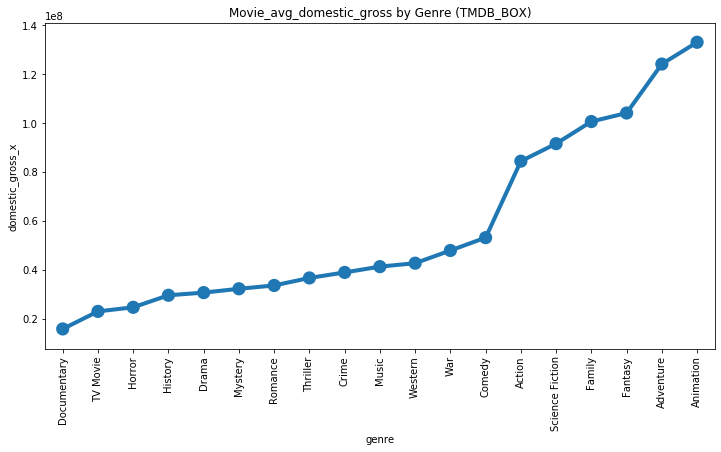

In [165]:
fig, ax = plt.subplots(figsize = (12,6))
#data
data = genre_group.mean().sort_values('domestic_gross_x')['domestic_gross_x'].reset_index()
#sns
sns.pointplot(ax = ax, 
              x = data['genre'], 
              y = data['domestic_gross_x'],
              scale = 1.5)
plt.xticks(rotation='vertical')
plt.title('Movie_avg_domestic_gross by Genre (TMDB_BOX)');

#### Plot : Genre - MovieCount (bar plot)

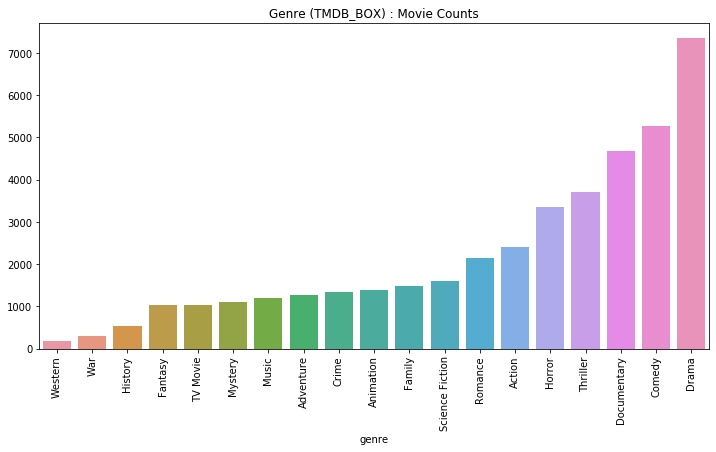

In [146]:
fig, ax = plt.subplots(figsize = (12,6))
#data
data_count = genre_group.count().sort_values('title')['title'] #movie count
#sns - movie count
sns.barplot(ax = ax, 
            x = data_count.index, 
            y = data_count.values)            
# plt format
plt.xticks(rotation='vertical')
plt.title('Genre (TMDB_BOX) : Movie Counts');

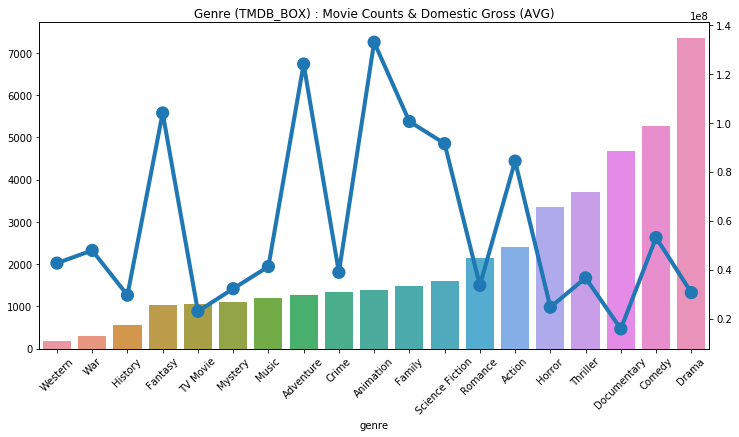

In [182]:
fig, ax = plt.subplots(figsize = (12,6))
#data
data_count = genre_group.count().sort_values('title')['title'] #movie count
idx = data_count.index #index with count
data_DG_avg = genre_group.mean().loc[idx,'domestic_gross_x']#avg domestic gross
#sns - movie count
movie_count = sns.barplot(ax = ax, 
            x = idx, 
            y = data_count.values)
#sns - avg domestic gross
ax2=ax.twinx()
domestic_gross=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_DG_avg.values,
             scale = 1.5) 
movie_count.set_xticklabels(movie_count.get_xticklabels(), rotation=45)
# plt format
#plt.xticks(ticks=range(0,len(idx)),labels=idx, rotation='vertical')
plt.title('Genre (TMDB_BOX) : Movie Counts & Domestic Gross (AVG)');

## plots - "Genre : Revene-Budget"

### Profitability Insights 
1. Most **Profitable** Genre (6): 
    - Animation
    - Adventure
    - Fantasy
    - Family
    - Science Fiction
    - Action

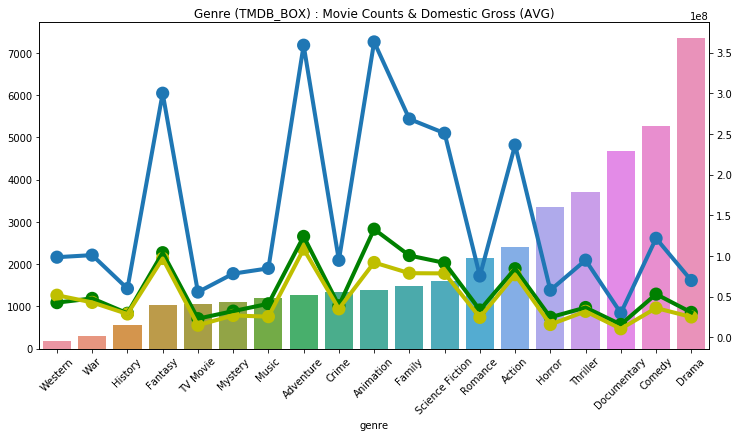

In [197]:
fig, ax = plt.subplots(figsize = (12,6))
#data
data_count = genre_group.count().sort_values('title')['title'] #movie count
idx = data_count.index #index with count
data_grossW = genre_group.mean().loc[idx,'worldwide_gross']#avg worldwide_gross
data_grossD = genre_group.mean().loc[idx,'domestic_gross_x']#avg worldwide_gross
data_budget = genre_group.mean().loc[idx,'production_budget'] #production_budget
#sns - movie count
movie_count = sns.barplot(ax = ax, 
            x = idx, 
            y = data_count.values
            )
#sns - avg domestic gross
ax2=ax.twinx()
worldwide_gross=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_grossW.values,
             scale = 1.5
             ) 
domestic_gross=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_grossD.values,
             color = 'g',
             scale = 1.5
             ) 
budget=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_budget.values,
             color = 'y',
             scale = 1.5
             ) 
movie_count.set_xticklabels(movie_count.get_xticklabels(), rotation=45)
# plt format
#plt.xticks(ticks=range(0,len(idx)),labels=idx, rotation='vertical')
plt.title('Genre (TMDB_BOX) : Movie Counts & Gross (AVG) & ')
#plt.legend(handlehandles = (movie_count,domestic_gross,budget), 
#           labels = ('movie count','dg','b'))
plt.show()

## Plot - "Genre : Vote-Count"


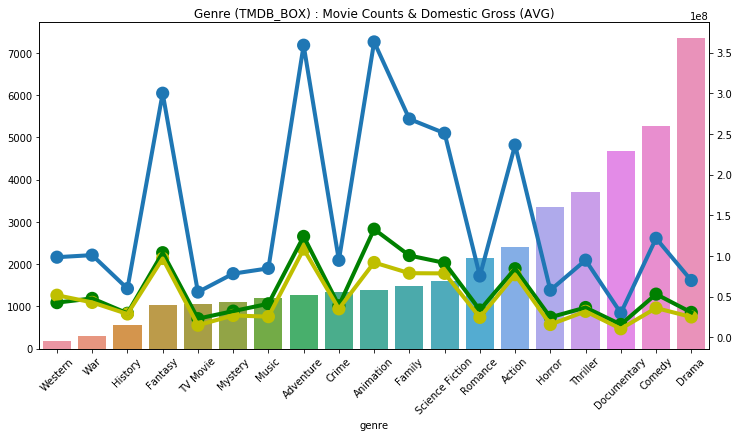

In [197]:
fig, ax = plt.subplots(figsize = (12,6))
#data
data_count = genre_group.count().sort_values('title')['title'] #movie count
idx = data_count.index #index with count

#sns - movie count
movie_count = sns.barplot(ax = ax, 
            x = idx, 
            y = data_count.values
            )
#sns - avg domestic gross
ax2=ax.twinx()
worldwide_gross=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_grossW.values,
             scale = 1.5
             ) 
domestic_gross=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_grossD.values,
             color = 'g',
             scale = 1.5
             ) 
budget=sns.pointplot(ax=ax2, 
             x = idx,
             y = data_budget.values,
             color = 'y',
             scale = 1.5
             ) 
movie_count.set_xticklabels(movie_count.get_xticklabels(), rotation=45)
# plt format
#plt.xticks(ticks=range(0,len(idx)),labels=idx, rotation='vertical')
plt.title('Genre (TMDB_BOX) : Movie Counts & Gross (AVG) & ')
#plt.legend(handlehandles = (movie_count,domestic_gross,budget), 
#           labels = ('movie count','dg','b'))
plt.show()

In [143]:
# Check 
print(tmdb_box_genre.shape)
tmdb_box_genre.sort_values('title', axis=0).head(3)

(41381, 13)


,title,production_budget,domestic_gross_x,worldwide_gross,studio,original_language,popularity,vote_average,vote_count,date,Year,Month,genre
51877,"""BLESSED""",NaN,NaN,NaN,NaN,en,0.6,7.0,1.0,2018-11-23,2018.0,11.0,Adventure
25871,"""BLESSED""",NaN,NaN,NaN,NaN,en,0.6,7.0,1.0,2018-11-23,2018.0,11.0,Documentary
10881,"""Legitimate Rape"" Pharmaceutical Ad",NaN,NaN,NaN,NaN,en,0.6,2.3,2.0,2012-08-28,2012.0,8.0,Comedy
